In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
get_ipython().run_line_magic('matplotlib', 'inline')
from scipy.signal import argrelextrema as get_extrema_indices

In [114]:
#checking data
file = open('lab.csv', 'r')
data = pd.read_csv('lab.csv')
data

,Time (s),Fᵧ (N),rᵧ (m),vᵧ (m/s),aᵧ (m/s²)
0,0.010000,0.012751,0.000,0.0,0.0
1,0.020000,0.012751,0.000,0.0,0.0
2,0.030000,0.011685,0.000,0.0,0.0
3,0.040000,0.010621,0.000,0.0,0.0
4,0.050000,0.007427,0.000,0.0,0.0
...,...,...,...,...,...
1794,17.950001,-0.001057,-0.005,0.0,0.0
1795,17.959999,-0.001069,-0.005,0.0,0.0
1796,17.969999,0.001058,-0.005,0.0,0.0
1797,17.980000,0.003187,-0.005,0.0,0.0


In [115]:
#inputing data into arrays
tx, force_data, pos_data, vel_data, accel_data = np.loadtxt('lab.csv', delimiter=",", skiprows=1, usecols=(0, 1, 2, 3, 4), unpack=True)

In [116]:
#interpolation
yinterp = interp1d(tx, accel_data, kind="linear")

In [117]:
#choosing best data
start_time = 4.5
stop_time = 13.87
step_size = 0.01
tvals = np.arange(start_time, stop_time, step_size)  
yvals = yinterp(tvals)

In [118]:
# Simple harmonic motion using acceleration
def simple_a(t, A, B, w, phi):                  # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B - A * (w**2) * np.cos(w*t + phi)   # output: acceleration


# Velocity-dependent friction using acceleration
def vdamped_a(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))   # output: acceleration


In [119]:
#initial guesses
Ainit, Binit, winit, phiinit, betainit=[0.1, -10, 7.5, 0.56, 0.4]

s_start_pars=[Ainit, Binit, winit, phiinit]
v_start_pars=[Ainit, Binit, winit, phiinit, betainit]

#parameter values and covariance
s_pars, s_cov = opt.curve_fit(simple_a, tvals-start_time, yvals, p0=s_start_pars)
v_pars, v_cov = opt.curve_fit(vdamped_a, tvals-start_time, yvals, p0=v_start_pars)

[sA, sB, sw, sphi] = s_pars
[vA, vB, vw, vphi, vbeta] = v_pars

#predicted values for simple_a model and vdamped_a model
s_ypred = simple_a(tvals-start_time, sA, sB, sw, sphi)
v_ypred = vdamped_a(tvals-start_time, vA, vB, vw, vphi, vbeta)

#calculating residuals
s_yresidual = yvals - s_ypred
v_yresidual = yvals - v_ypred

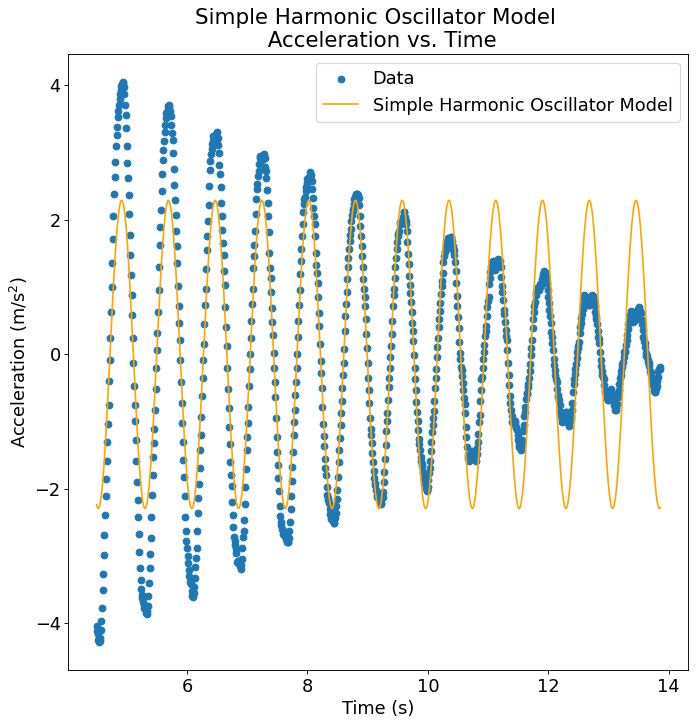

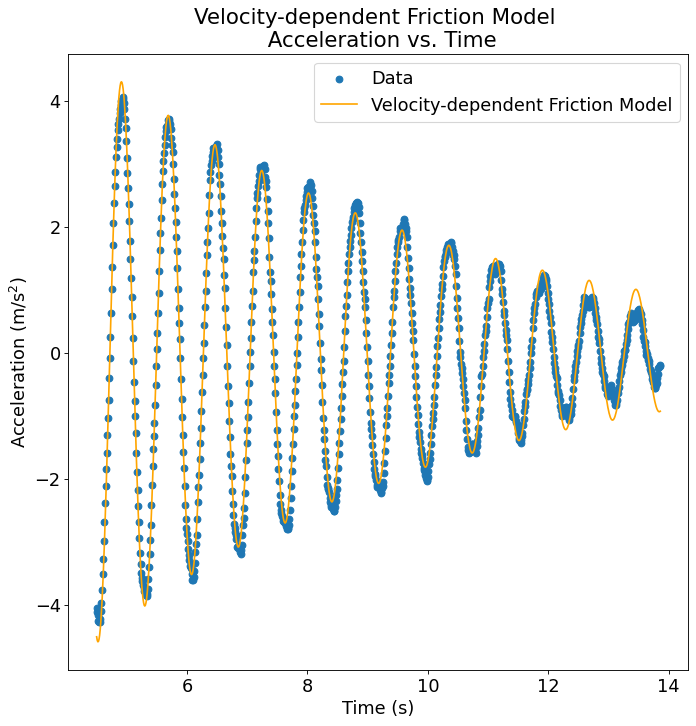

In [120]:
#plots
fig1=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})
plt.title("Simple Harmonic Oscillator Model \n Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.plot(tvals, s_ypred, color='orange', label="Simple Harmonic Oscillator Model")
plt.scatter(tvals, yvals, label="Data")
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig("images/sho_fit.png")

fig2=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})
plt.title("Velocity-dependent Friction Model \n Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s$^2$)")
plt.plot(tvals, v_ypred, color='orange', label="Velocity-dependent Friction Model")
plt.scatter(tvals, yvals, label="Data")
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig("images/vel_fit.png")


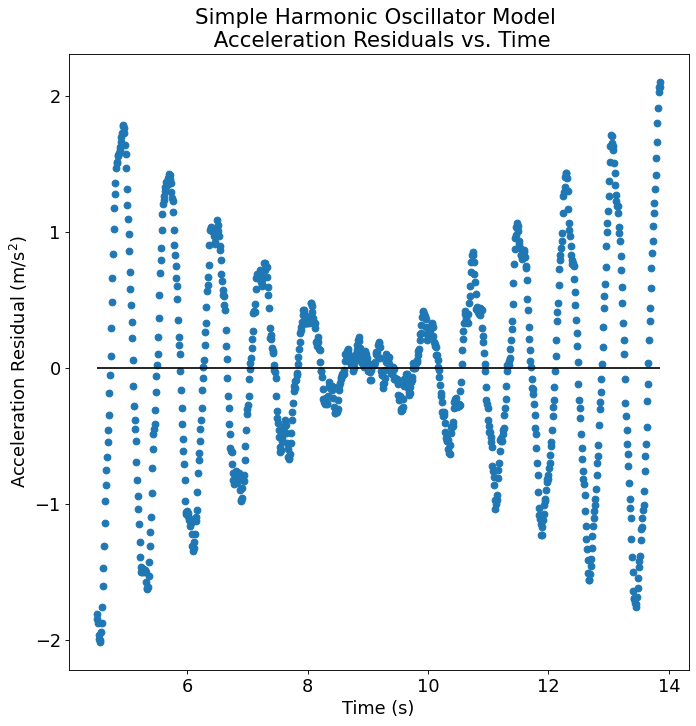

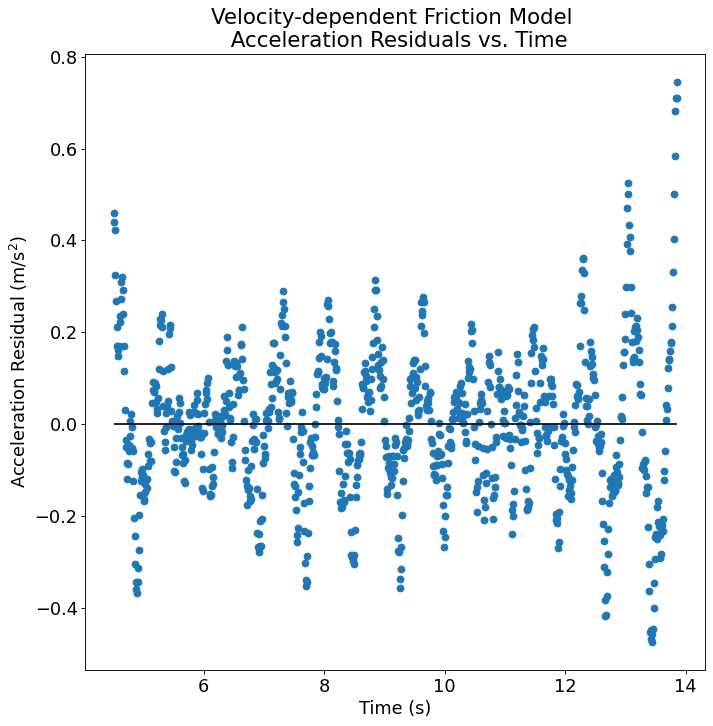

In [121]:
#residuals

fig3=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})
plt.title("Simple Harmonic Oscillator Model \n Acceleration Residuals vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Residual (m/s$^2$)")
plt.hlines(0, min(tvals), max(tvals), color='k')
plt.scatter(tvals, s_yresidual, label="Simple Harmonic Oscillator Model")
plt.savefig("images/sho_residual.png")

fig4=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})
plt.title("Velocity-dependent Friction Model \n Acceleration Residuals vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Residual (m/s$^2$)")
plt.hlines(0, min(tvals), max(tvals), color='k')
plt.scatter(tvals, v_yresidual, label="Velocity-dependent Friction Model")
plt.savefig("images/vel_residual.png")


Acceleration Data
Maxima found:  [ 4.05272445  3.7116279   3.30525541  2.97471028  2.71256325  2.38694272
  2.11944848  1.75114645  1.40976936  1.23917761  0.8836752   0.87894966
  0.69572628 -0.18913358]
Minima found:  [-4.2761831  -3.86058136 -3.60893026 -3.18666054 -2.51580706 -2.23131992
 -2.03143953 -1.59459616 -1.42383737 -1.06501453 -0.82999239 -0.55864584]


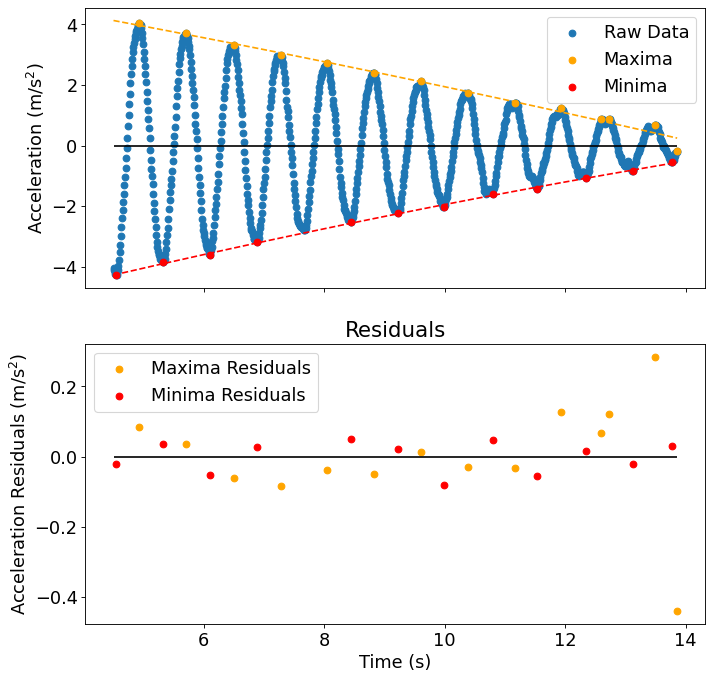

In [122]:
neighborhood_size = 11

a_max_indices = get_extrema_indices(yvals, np.greater, order=neighborhood_size)
a_min_indices = get_extrema_indices(yvals, np.less, order=neighborhood_size)

print("Acceleration Data")
print("Maxima found: ", yvals[a_max_indices])
print("Minima found: ", yvals[a_min_indices])

y_max = yvals[a_max_indices]
a_t_max = tvals[a_max_indices]
y_min = yvals[a_min_indices]
a_t_min = tvals[a_min_indices]

# Calculate linear fits for extreme points
a_max_fit_coef = np.polyfit(a_t_max, y_max, 2)
a_min_fit_coef = np.polyfit(a_t_min, y_min, 2)

a_max_fit = np.poly1d(a_max_fit_coef)
a_min_fit = np.poly1d(a_min_fit_coef)

a_max_residuals = y_max - a_max_fit(a_t_max)
a_min_residuals = y_min - a_min_fit(a_t_min)

fig5, (ax1, ax2)=plt.subplots(2, 1, sharex="col", figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})
fig8.suptitle("Constant Friction Oscillation \n Acceleration Extrema vs. Time")
ax2.set_xlabel("Time (s)")
ax1.set_ylabel("Acceleration (m/s$^2$)")
ax1.hlines(0, min(tvals), max(tvals), color='k')
ax1.scatter(tvals, yvals, label="Raw Data")
ax1.scatter(a_t_max, y_max, color='orange', label="Maxima")
ax1.plot(tvals, a_max_fit(tvals), color='orange', linestyle='dashed')
ax1.scatter(a_t_min, y_min, color='red', label="Minima")
ax1.plot(tvals, a_min_fit(tvals), color='red', linestyle='dashed')
ax1.legend()

ax2.set_title("Residuals")
ax2.set_ylabel("Acceleration Residuals (m/s$^2$)")
ax2.hlines(0, min(tvals), max(tvals), color='k')
ax2.scatter(a_t_max, a_max_residuals, color='orange', label="Maxima Residuals")
ax2.scatter(a_t_min, a_min_residuals, color='red', label="Minima Residuals")
ax2.legend()

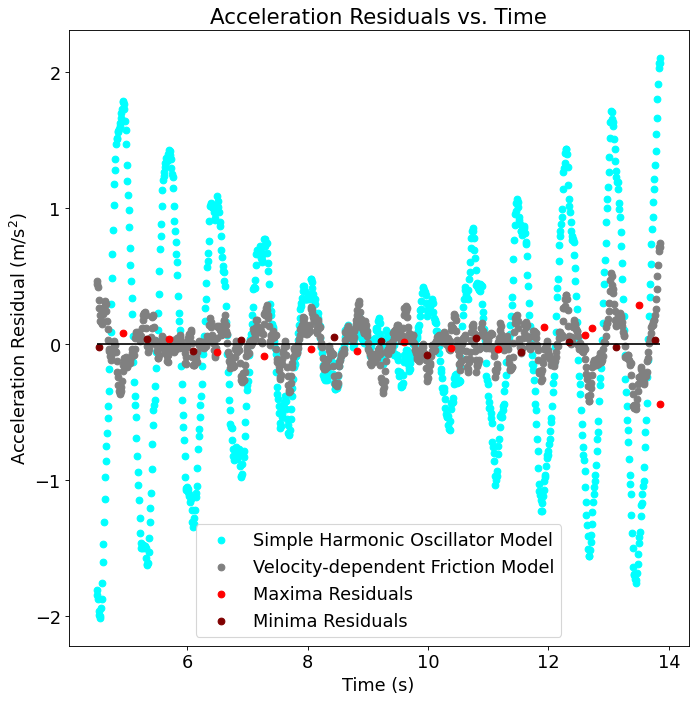

In [123]:
#residual comparison

fig6=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})
plt.title("Acceleration Residuals vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Residual (m/s$^2$)")
plt.hlines(0, min(tvals), max(tvals), color='k')
plt.scatter(tvals, s_yresidual, color='aqua', label="Simple Harmonic Oscillator Model")
plt.scatter(tvals, v_yresidual, color='gray', label="Velocity-dependent Friction Model")
plt.scatter(a_t_max, a_max_residuals, color='red', label="Maxima Residuals")
plt.scatter(a_t_min, a_min_residuals, color='maroon', label="Minima Residuals")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1,2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig("images/residuals.png")